# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.layers import Conv1D,Flatten,Dense,Dropout,BatchNormalization,Activation,MaxPooling1D
%matplotlib inline

Using TensorFlow backend.


# Loading Data

In [2]:
base_path = "Desktop/DATASET/"
base_path_2 = "Desktop/dataset2/"

In [3]:
i=0
n = 13
x=[]
y=[]
size = (100,100)

In [4]:
 while(i<=n):
    file = str(i)+".jpg"
    file_path = base_path + file
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,size)
    x.append(img)
    y.append("santosh")
    i = i+1

In [5]:
i=0
n=7
while(i<=n):
    file = str(i)+".jpg"
    file_path = base_path_2 + file
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,size)
    x.append(img)
    y.append("random person")
    i = i+1

# Functions for Image Anonimizations

In [6]:
# This function will spilt the layers of images (Red , Blue and Green)
def seperate(x):
    img0 = []
    img1 = []
    img2 = []
    img0 = x[:,:,0]
    img1 = x[:,:,1]
    img2 = x[:,:,2]
    return img0,img1,img2

In [7]:
#This function will combine the three layers to form an images
def combine(img0,img1,img2):
    img=[]
    for i in range(100):
        for j in range(100):
            img.append(img0[i][j])
            img.append(img1[i][j])
            img.append(img2[i][j])
    img = np.array(img)
    img.reshape(100,100,3)
    return img

In [8]:
#This function will take the average of accuracy of different images
def average(a,b,c):
    sum = a+b+c
    average = sum/3
    return average

# Making data ready for machine

In [9]:
# splitting x into x0,x1,x2
x0 = []
x1 = []
x2 = []

In [10]:
for i in range(len(x)):
    a,b,c = seperate(x[i])
    x0.append(a)
    x1.append(b)
    x2.append(c)

In [11]:
# making a Duplicate value for machine learning because their is difference between numpy and list

In [12]:
temp0 = x0
temp1 = x1
temp2 = x2

In [13]:
temp0 = np.array(temp0)
temp1 = np.array(temp1)
temp2 = np.array(temp2)
y = np.array(y)

In [14]:
nb_classes = 2
encoder = LabelEncoder()
encoder_y = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(encoder_y,nb_classes)

In [15]:
y_onehot = np.array(y_onehot)
x = shuffle(x,random_state = 7)
temp0 = shuffle(temp0,random_state = 7)
temp1 = shuffle(temp1,random_state = 7)
temp2 = shuffle(temp2,random_state = 7)
y = shuffle(y,random_state = 7)
y_onehot = shuffle(y_onehot,random_state = 7)

# Data Visualization

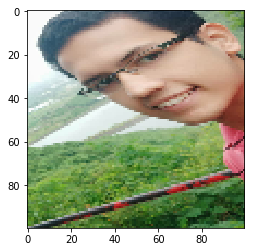

In [16]:
# actual image
plt.imshow(x[0])

In [17]:
# actual image in machine
x[0]

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 81, 122,  77],
        [102, 142,  92],
        [ 94, 133,  75]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [117, 148, 102],
        [135, 174,  76],
        [ 99, 145,  45]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [126, 155, 121],
        [120, 154, 100],
        [ 95, 138,  75]],

       ...,

       [[ 89, 154,  49],
        [ 89, 146,  52],
        [ 85, 132,  52],
        ...,
        [ 79, 142,  78],
        [ 77, 138,  84],
        [ 55, 116,  64]],

       [[ 74, 132,  27],
        [ 86, 135,  31],
        [ 94, 127,  58],
        ...,
        [ 86, 142,  68],
        [ 92, 143,  60],
        [ 88, 143,  47]],

       [[176, 186, 183],
        [148, 149, 151],
        [112, 122, 123],
        ...,
        [ 90, 142,  22],
        [102, 151,  26],
        [ 92, 140,  23]]

In [18]:
# Layers of an images
print(x0[0])
print(x1[0])
print(x2[0])
# you can not plot images unless you have all the 3 layers

[[212 215 216 ... 218 218 218]
 [212 213 216 ... 218 217 218]
 [215 214 215 ... 219 218 217]
 ...
 [ 68 111 164 ... 213 213 212]
 [ 73 163 166 ... 211 210 209]
 [118 159 160 ... 211 211 210]]
[[253 252 252 ... 253 253 253]
 [251 252 251 ... 253 252 253]
 [254 253 254 ... 254 253 253]
 ...
 [ 27 103 174 ... 243 243 242]
 [ 30 167 172 ... 243 242 241]
 [ 97 168 171 ... 243 243 242]]
[[247 248 248 ... 249 249 249]
 [246 247 247 ... 249 248 249]
 [249 248 249 ... 250 249 248]
 ...
 [ 30 100 174 ... 241 243 240]
 [ 34 168 170 ... 240 239 238]
 [ 91 163 165 ... 240 240 239]]


# Processing Data

In [19]:
temp0.shape

(22, 100, 100)

In [20]:
y.shape

(22,)

# Processing all Layers

first layer

In [159]:
temp0_train,temp0_test,y_train,y_test = train_test_split(temp0,y_onehot,test_size = 0.25 , random_state = 7)

In [160]:
model0=Sequential()
model0.add(Conv1D(kernel_size=(3),filters=3,input_shape=(100,100),activation="relu"))
model0.add(Conv1D(kernel_size=(3),filters=10,activation="relu",padding="same"))
model0.add(MaxPooling1D(pool_size=(2),strides=(2)))
model0.add(Conv1D(kernel_size=(3),filters=3,activation="relu"))
model0.add(Conv1D(kernel_size=(5),filters=5,activation="relu"))
model0.add(MaxPooling1D(pool_size=(3),strides=(2)))
model0.add(Conv1D(kernel_size=(2),strides=(2),filters=10))
model0.add(Flatten())
model0.add(Dropout(0.3))
model0.add(Dense(100,activation="relu"))
model0.add(Dense(2,activation="softmax"))
model0.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model0.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_101 (Conv1D)          (None, 98, 3)             903       
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 98, 10)            100       
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 49, 10)            0         
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 47, 3)             93        
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 43, 5)             80        
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 21, 5)             0         
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 10, 10)          

In [168]:
model0.fit(temp0_train,y_train, validation_data=(temp0_test,y_test),batch_size=32,epochs=50,callbacks=[checkpoint])

Train on 16 samples, validate on 6 samples
Epoch 1/50
16/16 [==============================] - 0s 996us/step - loss: 0.3149 - accuracy: 0.9375 - val_loss: 0.5374 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 0.5660 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 876us/step - loss: 0.4114 - accuracy: 0.7500 - val_loss: 0.6679 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 699us/step - loss: 0.1966 - accuracy: 0.8750 - val_loss: 0.6738 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 952us/step - loss: 0.1541 - accuracy: 0.9375 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 662us/step - loss: 0.2118 - accuracy: 0.9375 - val_loss: 0.6074 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 842us/step - loss: 0.2420 - accuracy: 0.8750 - val_l

second layer

In [107]:
temp1_train,temp1_test,y_train,y_test = train_test_split(temp1,y_onehot,test_size = 0.25 , random_state = 7)

In [108]:
model1=Sequential()
model1.add(Conv1D(kernel_size=(3),filters=3,input_shape=(100,100),activation="relu"))
model1.add(Conv1D(kernel_size=(3),filters=10,activation="relu",padding="same"))
model1.add(MaxPooling1D(pool_size=(2),strides=(2)))
model1.add(Conv1D(kernel_size=(3),filters=3,activation="relu"))
model1.add(Conv1D(kernel_size=(5),filters=5,activation="relu"))
model1.add(MaxPooling1D(pool_size=(3),strides=(2)))
model1.add(Conv1D(kernel_size=(2),strides=(2),filters=10))
model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(100,activation="relu"))
model1.add(Dense(2,activation="softmax"))
model1.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model1.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 98, 3)             903       
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 98, 10)            100       
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 49, 10)            0         
_________________________________________________________________
conv1d_88 (Conv1D)           (None, 47, 3)             93        
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 43, 5)             80        
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 21, 5)             0         
_________________________________________________________________
conv1d_90 (Conv1D)           (None, 10, 10)          

In [116]:
model1.fit(temp1_train,y_train, validation_data=(temp1_test,y_test),batch_size=32,epochs=100,callbacks=[checkpoint])

Train on 16 samples, validate on 6 samples
Epoch 1/100
16/16 [==============================] - 0s 973us/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.1623 - val_accuracy: 0.6667
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 1.1445 - val_accuracy: 0.6667
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.8750 - val_loss: 0.5653 - val_accuracy: 0.8333
Epoch 4/100
16/16 [==============================] - 0s 819us/step - loss: 0.4641 - accuracy: 0.7500 - val_loss: 0.5096 - val_accuracy: 0.8333
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7500 - val_loss: 1.2508 - val_accuracy: 0.6667
Epoch 6/100
16/16 [==============================] - 0s 787us/step - loss: 0.0789 - accuracy: 0.9375 - val_loss: 0.7502 - val_accuracy: 0.6667
Epoch 7/100
16/16 [==============================] - 0s 980us/step - loss: 0.0537 - accuracy: 1.0000 - va

Epoch 58/100
16/16 [==============================] - 0s 848us/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.8798 - val_accuracy: 0.6667
Epoch 59/100
16/16 [==============================] - 0s 836us/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.8815 - val_accuracy: 0.6667
Epoch 60/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.9016 - val_accuracy: 0.6667
Epoch 61/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.9061 - val_accuracy: 0.6667
Epoch 62/100
16/16 [==============================] - 0s 807us/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.9126 - val_accuracy: 0.6667
Epoch 63/100
16/16 [==============================] - 0s 985us/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.9465 - val_accuracy: 0.6667
Epoch 64/100
16/16 [==============================] - 0s 826us/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.9531 - val_accuracy: 0.6

third layer

In [143]:
temp2_train,temp2_test,y_train,y_test = train_test_split(temp2,y_onehot,test_size = 0.25 , random_state = 7)

In [144]:
model2=Sequential()
model2.add(Conv1D(kernel_size=(3),filters=3,input_shape=(100,100),activation="relu"))
model2.add(Conv1D(kernel_size=(3),filters=10,activation="relu",padding="same"))
model2.add(MaxPooling1D(pool_size=(2),strides=(2)))
model2.add(Conv1D(kernel_size=(3),filters=3,activation="relu"))
model2.add(Conv1D(kernel_size=(5),filters=5,activation="relu"))
model2.add(MaxPooling1D(pool_size=(3),strides=(2)))
model2.add(Conv1D(kernel_size=(2),strides=(2),filters=10))
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(100,activation="relu"))
model2.add(Dense(2,activation="softmax"))
model2.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model2.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 98, 3)             903       
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 98, 10)            100       
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 49, 10)            0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 47, 3)             93        
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 43, 5)             80        
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 21, 5)             0         
_________________________________________________________________
conv1d_100 (Conv1D)          (None, 10, 10)          

In [152]:
model2.fit(temp1_train,y_train, validation_data=(temp1_test,y_test),batch_size=32,epochs=100,callbacks=[checkpoint])

Train on 16 samples, validate on 6 samples
Epoch 1/100
16/16 [==============================] - 0s 980us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.5912 - val_accuracy: 0.8333
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 2.8951 - val_accuracy: 0.8333
Epoch 3/100
16/16 [==============================] - 0s 827us/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 2.9572 - val_accuracy: 0.8333
Epoch 4/100
16/16 [==============================] - 0s 952us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9600 - val_accuracy: 0.8333
Epoch 5/100
16/16 [==============================] - 0s 821us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 2.9817 - val_accuracy: 0.8333
Epoch 6/100
16/16 [==============================] - 0s 902us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.9620 - val_accuracy: 0.8333
Epoch 7/100
16/16 [==============================] - 0s 836us/step - loss: 0.0063 - accuracy: 1.0000 

Epoch 58/100
16/16 [==============================] - 0s 985us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 3.4683 - val_accuracy: 0.8333
Epoch 59/100
16/16 [==============================] - 0s 939us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.3891 - val_accuracy: 0.8333
Epoch 60/100
16/16 [==============================] - 0s 865us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.4385 - val_accuracy: 0.8333
Epoch 61/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.4474 - val_accuracy: 0.8333
Epoch 62/100
16/16 [==============================] - 0s 928us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.5279 - val_accuracy: 0.8333
Epoch 63/100
16/16 [==============================] - 0s 936us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.5903 - val_accuracy: 0.8333
Epoch 64/100
16/16 [==============================] - 0s 957us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 3.6377 - val_accuracy: 0

# Calculating accuracy

In [169]:
model0.evaluate(temp0,y_onehot)

22/22 [==============================] - 0s 240us/step


[0.24040764570236206, 0.9545454382896423]

In [170]:
model1.evaluate(temp1,y_onehot)

22/22 [==============================] - 0s 237us/step


[0.2844415605068207, 0.9090909361839294]

In [171]:
model2.evaluate(temp2,y_onehot)

22/22 [==============================] - 0s 237us/step


[0.5820909738540649, 0.9090909361839294]

# Displaying Output

In [172]:
cls = ["Random Person" , "Santosh"]

In [173]:
def get_pred(x):
    #Seperating the Layers in images
    a,b,c = seperate(x)
    img0 = a
    img1 = b
    img2 = c
    #resizing the images
    img0 = cv2.resize(img0,(100,100))
    img1 = cv2.resize(img1,(100,100))
    img2 = cv2.resize(img2,(100,100))
    img0 = np.reshape(img0,(1,100,100))
    img1 = np.reshape(img1,(1,100,100))
    img2 = np.reshape(img2,(1,100,100))
    #pre dicting the values 
    pr0 = model0.predict(img0)
    pr1 = model1.predict(img1)
    pr2 = model2.predict(img2)
    #picking the greatest value 
    idx0 = np.argmax(pr0)
    pv0 = pr0[0][idx0]
    idx1 = np.argmax(pr1)
    pv1 = pr1[0][idx1]
    idx2 = np.argmax(pr2)
    pv2 = pr2[0][idx2]
    pv = average(pv0,pv1,pv2)
    per = round(pv*100 , 2)
    lab = cls[idx0]
    return lab,per

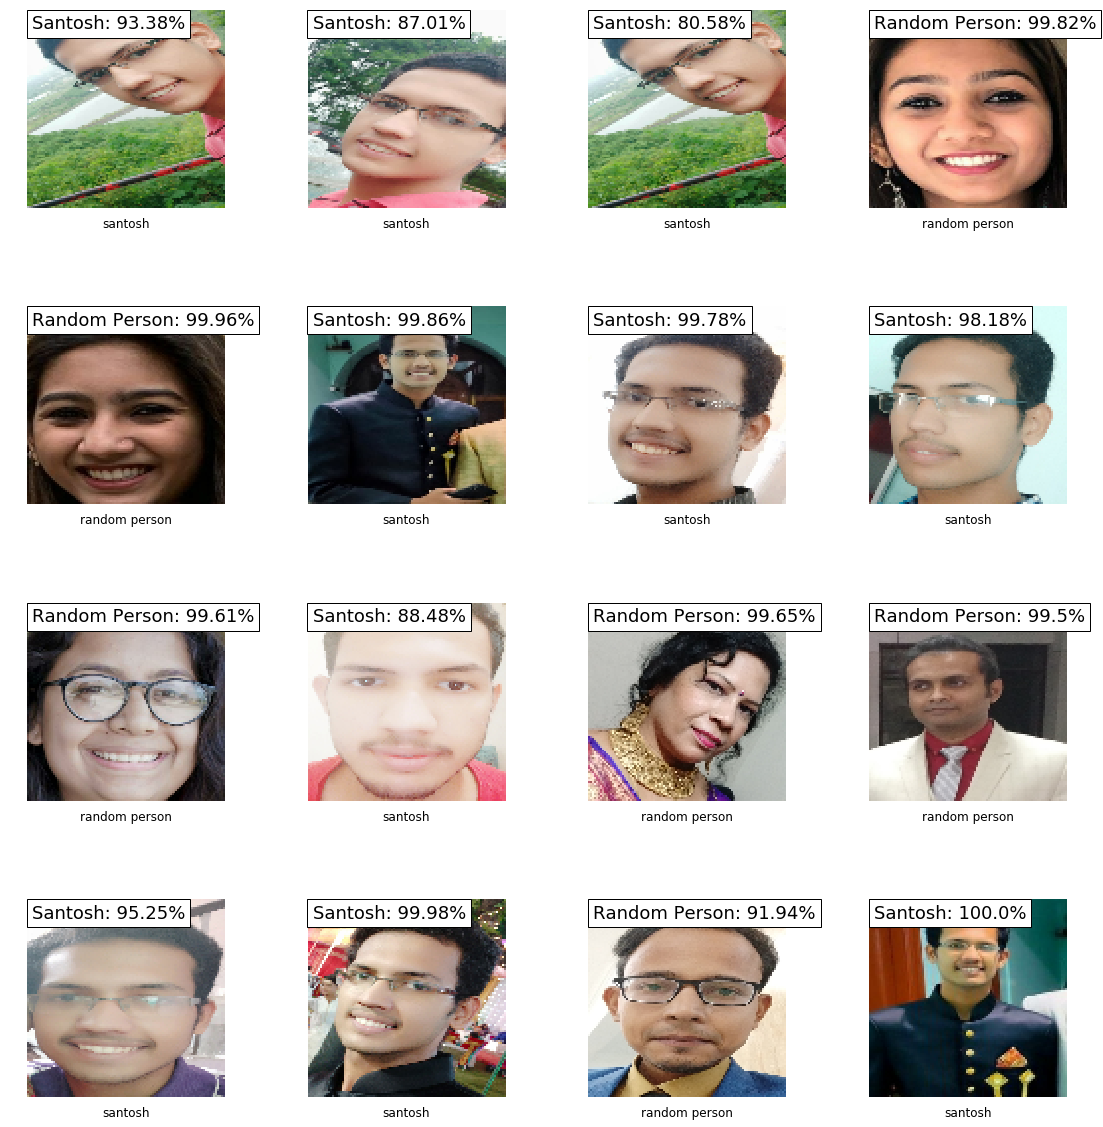

In [174]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(4,4)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(16):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(y[i]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_pred(x[i])
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(x[i])


In [46]:
y.shape

(25,)

In [47]:
temp0.shape

(25, 100, 100)

In [100]:
len(y)

34

In [116]:
y

array(['santosh', 'random person', 'santosh', 'santosh', 'santosh',
       'santosh', 'random person', 'random person', 'random person',
       'random person', 'random person', 'santosh', 'santosh', 'santosh',
       'random person', 'santosh', 'random person', 'random person',
       'santosh', 'random person', 'random person', 'santosh',
       'random person', 'santosh', 'random person', 'santosh',
       'random person', 'santosh', 'random person', 'random person',
       'santosh', 'random person', 'random person', 'santosh'],
      dtype='<U13')